# Getting Started with PyTorch
    
<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

**Authors**: 
- Dr Antonia Mey (antonia.mey@ed.ac.uk)
- Katerina Karoni

Some content was also adapted from the [scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html) and [pytorch](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) documentation and examples. 

**Learning Objectives**:
* Getting familiar with some PyTorch basics:
    * What is a tensor
    * How to build a dataset
    * How to build a neural network
    * Choosing an optimiser
    * Testing and training a neural network

**Jupyter cheat sheet**:
* to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
* to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

## PyTorch Overview

PyTorch is a Python framework that provides two high-level features:

    Tensor computation (like NumPy) with strong GPU acceleration
    Deep neural networks built on a autograd system

You can reuse your favorite Python packages such as NumPy to extend PyTorch when needed.

**<h2>Pytorch Installation**

So far we have only used scikit-learn. Today we will be using PyTorch. If you wanted to install it locally then use the command below:

```conda install pytorch torchvision -c pytorch```

For more information on the installation please check out: https://pytorch.org/get-started/locally/

⚠️ If you want to make use of the GPUs on Colab we should use the Colab version of today's notebook!

## Google Colab package installs

<div class="alert alert-warning">
The following cell install necessary packages and downloads data if you are running this tutorial using Google Colab.<br>
<b><i>Run this cell only if you are using Google Colab!</i></b></div>

In [ ]:
!if [ -n "$COLAB_RELEASE_TAG" ]; then pip install condacolab; fi
import condacolab
condacolab.install()

import condacolab
condacolab.check()
!mamba install -c conda-forge scikit-learn
!mamba install pytorch torchvision torchinfo -c pytorch

# copy over data repository
!if [ -n "$COLAB_RELEASE_TAG" ]; then git clone https://github.com/Edinburgh-Chemistry-Teaching/ML-for-Chemistry; fi
!if [ -n "$COLAB_RELEASE_TAG" ]; then cp -r ML-for-Chemistry/data .; fi

## Imports

In [133]:
import torch

**<h2>Tensors**
    
A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either **CPU** or **GPU**. To run operations on the GPU, just cast the Tensor to a `cuda datatype`.

In [134]:
x = torch.Tensor([[1,2,3],[4,5,6]])

print(f'x = {x}')

print(f'Size of x = {x.size()}') # np.shape(x) also works

print(f'Data type of x = {x.dtype}')

x = tensor([[1., 2., 3.],
        [4., 5., 6.]])
Size of x = torch.Size([2, 3])
Data type of x = torch.float64


In [135]:
# we can also specify data type

y = torch.zeros(2,3,dtype=torch.float32) 

print(f'y = {y}')

print(f'Data type of y = {y.dtype}')

y = tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float32)
Data type of y = torch.float32


**Casting tensor x as cuda datatype if cuda available**

In [136]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Attention: ```x.to(device)``` will not cast ```x```as cuda datatype - we need
```x = x.to(device)```

In [137]:
y = x.to(device) # or x = x.cuda() for GPU
print(x.is_cuda)

False


Note: For tensors ```x.to(device)```, as mentioned does not move ```x``` to cuda and we need to write ```x = x.to(device)``` instead.

However, for neural networks, ```net.to(device)``` and
```net = net.to(device)``` are equivalent.


**Tensor Data types**

```DoubleTensor``` is ```64-bit``` floating point and ```FloatTensor``` is ```32-bit``` floating point tensor. So a ```FloatTensor``` uses half of the memory as a same tensor-size ```DoubleTensor``` uses. Also GPU and CPU computations with lower precision are much faster.  However, if high precision is needed, go for ```DoubleTensor``` . So Pytorch leaves it to user to choose which one to use.

Set default tensor type for your notebook

In [138]:
torch.set_default_tensor_type('torch.FloatTensor')    # 32 bits
#or
torch.set_default_tensor_type('torch.DoubleTensor')    # 64 bits

In [139]:
x = torch.zeros(2,3) 
print(x)
print(x.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.float64


## Show case: Components needed to run a classification with a neural network

We will now present an example where we train a fully-connected neural network on a popular benchmark dataset: MNIST handwritten digits.

The MNIST had-written digits dataset consists of 60,000 training examples and 10,000 test examples. Each example comprises a 8×8 image and an associated label from one of 10 classes.

In [140]:
# Imports
from sklearn import datasets
from   torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

### Loading data

The ```torchvision``` library consists of popular datasets, model architectures, and common image transformations for computer vision. Since we have been using `scikit learn` we will use this data set in the example here:

In [141]:
from sklearn import datasets

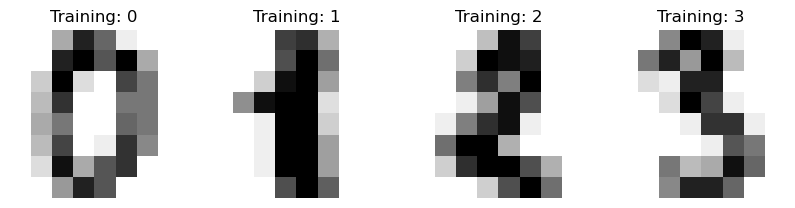

In [142]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [143]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [144]:
# creating a torch tensor:

x = torch.Tensor(digits['data']) # data
y = torch.Tensor(digits['target']) # labels

In [146]:
y

tensor([0., 1., 2.,  ..., 8., 9., 8.])

**<h3> Dataloader class**
    
https://pytorch.org/docs/stable/data.html#map-style-datasets

At the heart of ```PyTorch``` data loading utility is the ```torch.utils.data.DataLoader``` class. It represents a Python iterable over a dataset

```python
DataLoader(dataset, batch_size=1, shuffle=False, 
           sampler=None,batch_sampler=None, num_workers=0,
           collate_fn=None,pin_memory=False, drop_last=False, 
           timeout=0, worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)
```

The most important argument of ```DataLoader``` constructor is ```dataset```, which indicates a dataset object to load data from. PyTorch supports two different types of datasets:

- Map style datasets: Datasets that implement the ```__getitem__()``` and ```__len__()``` methods and are maps from keys to data samples.

- Iterable style datasets: When reading from a stream of data. 


In [147]:
## Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Let's check that our data is of torch data type

In [148]:
type(X_train)

torch.Tensor

In [ ]:
# Next the data needs to be wrapped into a Tensor dataset and then we can use a dataloader

In [149]:
# Wrap your data in TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create the dataloaders
batch_size = 128
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [150]:
# Reshape train and test images from 8x8 to 1x64
for i,data in enumerate(dataloader_train):
    xtrain = data[0].view(-1,64)       # torch.Tensor.view() is equivalent to reshape
    ytrain = data[1].type(torch.LongTensor)                    # train labels

for i,data in enumerate(dataloader_test):      
    xtest = data[0].view(-1,64)     # test images, The size -1 is inferred from other dimensions
    ytest = data[1].type(torch.LongTensor)                            # test labels

In [151]:
flat_mnist_train       = TensorDataset(xtrain, ytrain)
flat_dataloader_train  =  DataLoader(flat_mnist_train, batch_size=256, shuffle=True)

In [152]:
np.shape(xtrain)

torch.Size([125, 64])

In [153]:
type(ytrain)

torch.Tensor

## Defining the Neural network

This is a 4 layer linear fully connected network. This is just an example
Notice how the forward function is defined and how it uses the ReLu activation function. 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [154]:
class Neural_net(nn.Module):    # this class inherits from nn.Module
    def __init__(self):
        super(Neural_net, self).__init__() #this calls the constructor of the parent class nn.Module
        
        # define network layers
        self.fc1 = nn.Linear(64, 20)   # nn.Linear is a class for linear layers (16,12) are the constructor arguments
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 10)
        torch.manual_seed(4)           # generating numbers changes the state of the random number generator.
                                       # we thus have to set the seed back to 2  
            
        # Notice the RELU activation function below
    def forward(self,x):
        x = torch.relu(self.fc1(x))  # 
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [155]:
net = Neural_net()

In [156]:
def class_accuracy(output,y):
    '''If np.argmax(out,axis=1)-y is non-zero, i.e. label y is 9 and prediction is 5 then 
       diff is incremented by 1, i.e. every time there is a mismatch between prediction and label.
       The ratio diff/np.size(y) gives us the ratio of false predictions over the total number of datapoints.
       One minus that gives the model accuracy.
       '''
    # we can't call numpy() on Tensors that requires grad. So, in order to compute diff (see below)
    # we need to use tensor.detach().numpy()
    output = output.cpu().detach().numpy()    # no need for the .cpu() here as we are working with cpu tensors
    y      = y.cpu().detach().numpy()
    diff   = np.count_nonzero(np.argmax(output,axis=1)-y) # np.argmax returns the index/indices of max value(s)
                                                        # along specified axis
    return (1-(diff/np.size(y)))*100

## Important Model and training parameters 

### The optimiser

The optimiser module gives access to a large number of standard optimisers that try and help minimise the loss.

In [157]:
import torch.optim as optim

There are different options. Take a look at adam and sgd (stocastic gradient descent), both are very common choices

### The loss

Typically for a classification problem one would use a cross entrop loss, the [torch documentation](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) has some more details on this.

Cross entropy loss is generally defined for two probability distributions $p$ and $q$ as:

$$H(p,q) =  –\sum_{x \in \mathcal{X}} p(x)  \log(q(x))$$

For binary classification

$$\mathrm{loss}=−(y \log(p)+(1−y) \log(1−p))$$

### The learning rate 
This is a parameter you set in your optimiser an you can play around with different values for it.

In [ ]:
net

In [158]:
num_epochs = 100

# The criterion we want to optimse
criterion = nn.CrossEntropyLoss()

# Defining the optimiser
# lr is the learnig rate
optimizer = optim.Adam(net.parameters(), lr=5*10**-3)

for epoch in range(num_epochs): 
    for i,data in enumerate(flat_dataloader_train):
        # Load in the training datapoints
        x=data[0]                 
        y=data[1]   
        optimizer.zero_grad()
        # The output of the current net
        output = net(x)
        loss = criterion(output,y) 
        loss.backward()
        # Optimising one more step
        optimizer.step()
                   
        if epoch % 1 == 0 and i==0:
            # test the accuracy 
            acc        = class_accuracy(output,y)
            outputtest = net(xtest)
            loss_test  = criterion(outputtest,ytest)
            acc_test   = class_accuracy(outputtest,ytest)
            print(f'epoch {epoch}/{num_epochs}, accuracy train {acc:.2f} %, loss train, {loss.item():.5f}, accuracy test {acc_test:.2f} %, loss test, {loss_test.item():.5f}')

epoch 0/100, accuracy train 15.20 %, loss train, 2.35421, accuracy test 11.54 %, loss test, 2.28370
epoch 1/100, accuracy train 12.00 %, loss train, 2.28578, accuracy test 12.50 %, loss test, 2.24444
epoch 2/100, accuracy train 12.00 %, loss train, 2.23142, accuracy test 16.35 %, loss test, 2.21314
epoch 3/100, accuracy train 22.40 %, loss train, 2.18321, accuracy test 17.31 %, loss test, 2.18146
epoch 4/100, accuracy train 24.80 %, loss train, 2.13286, accuracy test 17.31 %, loss test, 2.14936
epoch 5/100, accuracy train 25.60 %, loss train, 2.07737, accuracy test 17.31 %, loss test, 2.11977
epoch 6/100, accuracy train 25.60 %, loss train, 2.01628, accuracy test 17.31 %, loss test, 2.08212
epoch 7/100, accuracy train 28.00 %, loss train, 1.95280, accuracy test 19.23 %, loss test, 2.02651
epoch 8/100, accuracy train 28.80 %, loss train, 1.88514, accuracy test 20.19 %, loss test, 1.95977
epoch 9/100, accuracy train 28.00 %, loss train, 1.81541, accuracy test 20.19 %, loss test, 1.88947


<div class="alert alert-success">
<b>Task:</b> Train the neural network using 100 epochs and plot the quantities printed to screen.  </div>

In [ ]:
# Your solution here: 


<details>
    <summary> <mark> Solution: </mark> </summary>

```Python
# Let's reinisalise the network
net = Neural_net()

num_epochs = 100

# The criterion we want to optimse
criterion = nn.CrossEntropyLoss()

# Defining the optimiser
# lr is the learnig rate
optimizer = optim.Adam(net.parameters(), lr=5*10**-3)

# list where we want to store the training information
info = []
for epoch in range(num_epochs): 
    for i,data in enumerate(flat_dataloader_train):
        # Load in the training datapoints
        x=data[0]                 
        y=data[1]   
        optimizer.zero_grad()
        # The output of the current net
        output = net(x)
        loss = criterion(output,y) 
        loss.backward()
        # Optimising one more step
        optimizer.step()
                   
        if epoch % 1 == 0 and i==0:
            # test the accuracy
            acc        = class_accuracy(output,y)
            outputtest = net(xtest)
            loss_test  = criterion(outputtest,ytest).detach().cpu().numpy()
            acc_test   = class_accuracy(outputtest,ytest)
            print(float(loss_test))
            info.append([acc, float(loss_test),acc_test])
            print(f'epoch {epoch}/{num_epochs}, accuracy train {acc:.2f} %, loss train, {loss.item():.5f}, accuracy test {acc_test:.2f} %, loss test, {loss_test.item():.5f}')
info = np.array(info)
epochs = np.linspace(0,num_epochs,len(info))
plt.plot(epochs, info[:,0], label='accuracy')
plt.plot(epochs, info[:,1], label='loss_test')
plt.plot(epochs, info[:,2], label='accuracy test')
plt.legend()
```


</details>

## END
------